#1.자료 읽어오기

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f,index_col=0, parse_dates=['날짜'])

data.head()

,PM10,PM2.5,오존,이산화질소,일산화탄소,아황산가스
날짜,,,,,,
2018-08-25,23.0,12.0,0.037,0.021,0.4,0.003
2018-08-24,8.0,4.0,0.021,0.016,0.3,0.002
2018-08-23,13.0,7.0,0.010,0.019,0.3,0.003
2018-08-22,20.0,12.0,0.031,0.030,0.4,0.003
2018-08-21,21.0,11.0,0.030,0.024,0.4,0.003


#2.수평바 그리기

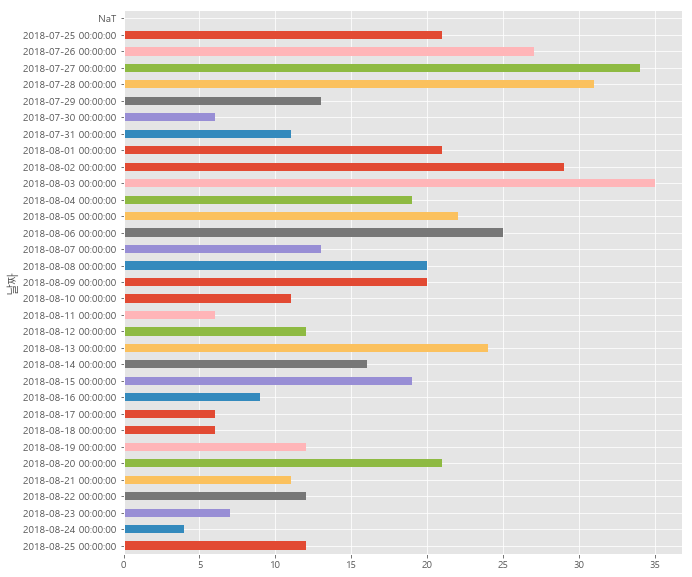

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f,index_col=0, parse_dates=['날짜'])

data['PM2.5'].plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

#3.정렬해서 수평바 그리기

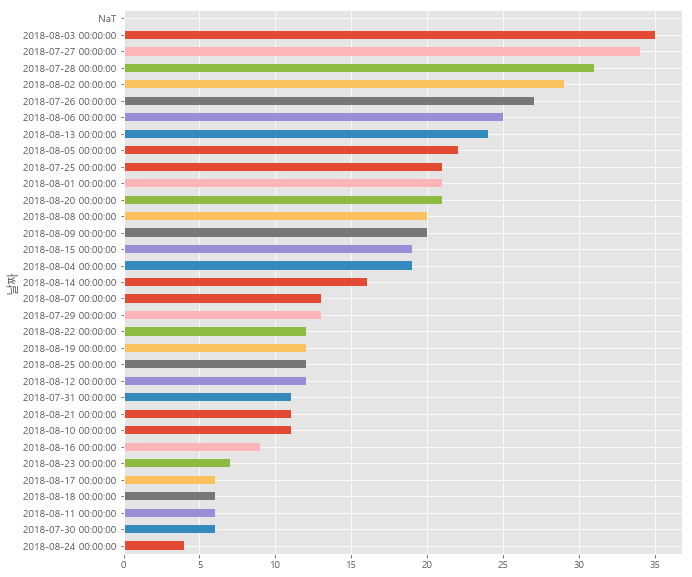

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pda
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825a.csv')
data=pd.read_csv(f,index_col=0, parse_dates=['날짜'])

data['PM2.5'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

plt.show()

#4. 산포도로 나타내기

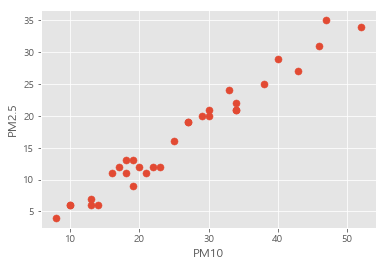

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

plt.scatter(data['PM10'],data['PM2.5'], s=50)
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.show()

#5. x축에 따라 색상지정하기

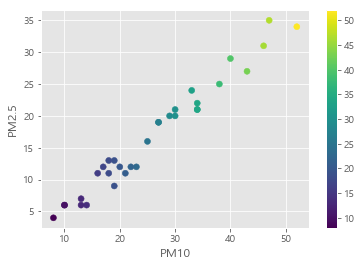

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

colormap=data['PM10']
plt.scatter(data['PM10'],data['PM2.5'],c=colormap)
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.colorbar()
plt.show()

#6.선형회귀(sesborn으로 해결)

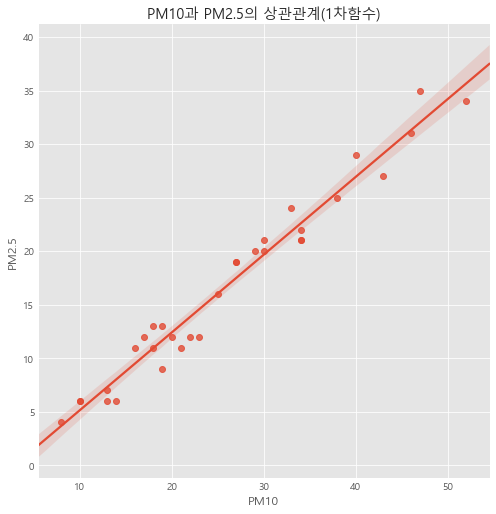

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)


sns.lmplot(x='PM10', y='PM2.5', data=data, palette='Set1', size=7)
plt.title('PM10과 PM2.5의 상관관계(1차함수)')
plt.show()



#7. 히트맵을 통해 상관계수를 분석하기

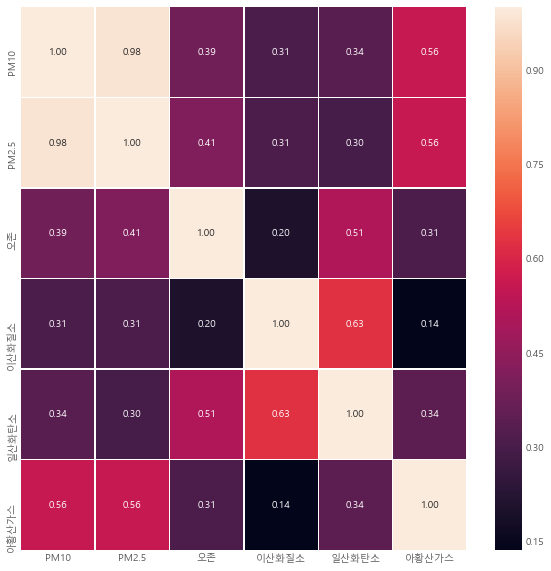

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#데이터 불러오기
f=open('대기정보측정자료_180825.csv')
data=pd.read_csv(f)

plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show()